<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

https://pynative.com/python-weighted-random-choices-with-probability/

In [103]:
# a)
import random

def alea_lacta_est(sides):
    
    values = [*range(1, sides+1)]
    n = sum(values)
    probabilities = [i/n for i in range(1, sides+1)]
    
    while True:
        yield random.choices(values, weights = probabilities, k = 1)
        
# rolling the die ten times
for i in range(0, 10):
    print(next(alea_lacta_est(8)))

[8]
[8]
[7]
[3]
[5]
[1]
[1]
[5]
[8]
[7]


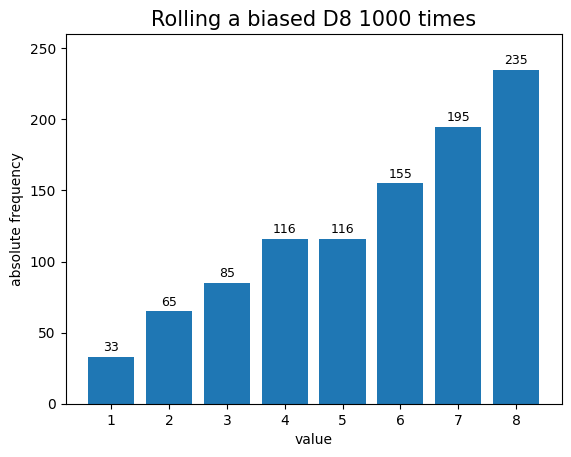

In [102]:
# b)
import collections
import itertools
from matplotlib import pyplot as plt

casts = [next(alea_lacta_est(8)) for i in range(0, 1000)]
casts = list(itertools.chain(*casts))
casts = collections.Counter(casts)
casts = {k: v for k, v in sorted(casts.items(), key = lambda item: item[1])}

barplot = plt.bar(range(len(casts)), list(casts.values()), align = 'center')
plt.xticks(range(len(casts)), list(casts.keys()))

plt.title('Rolling a biased D8 1000 times', fontsize=15)
plt.xlabel('value')
plt.ylabel('absolute frequency')
plt.bar_label(barplot, labels = list(casts.values()), label_type = 'edge', padding = 2, fontsize = 9)
plt.ylim([0, 260])

plt.show()

In [85]:
# c)


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  